In [1]:
###PYTHON NOTEBOOK FOR VISUALIZATION OF FIGURES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

In [2]:
#Wildtype growth conditions plotting
growth_conditions_names = ["galactose", "gluconate", "xylose", "lalanine", "lactate", "pyruvate", "ribose", "glucose", "fructose", "sorbitol", "mannitol", "glycerol", "succinate", "acetate"]

wt = pd.DataFrame()
for g in growth_conditions_names:
    ode_data = pd.read_csv("../data/medium_conditions/"+g+"_ode_data.csv")
    fba_data = pd.read_csv("../data/medium_conditions/"+g+"_fba_data.csv")
    wt = pd.concat([wt, pd.DataFrame({"gc": [g], "p_auc": [np.sum(ode_data.mi)], "p_final": [list(ode_data.mi)[-1]], "lam_final": [list(fba_data.lam)[-1]]})])  
print("Completed reading in files!")

Completed reading in files!


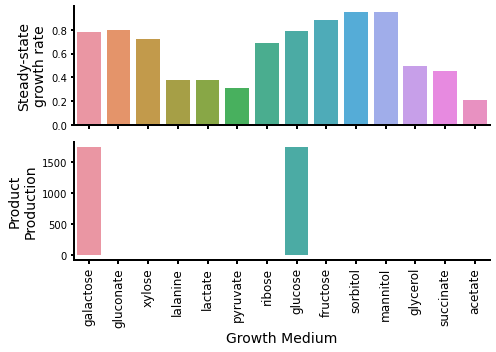

In [4]:

fig, axs = plt.subplots(2, 1,figsize=(7, 5), sharex=True)
ax = axs[0]
sns.barplot(data=wt, x='gc', y='lam_final', ax=ax)
ax.set_ylabel('Steady-state\ngrowth rate', fontsize=14)
ax.set_xlabel('')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.set_xlabel('')
#ax.set_yticks(fontsize=12)

ax = axs[1]
sns.barplot(data=wt, x='gc', y='p_auc', ax=ax)
ax.set_ylabel('Product\nProduction', fontsize=14)
ax.set_xlabel('Growth Medium', fontsize=14)
ax.set_xticklabels(growth_conditions_names, fontsize=12, rotation=90)

#ax.set_xticklabels(["Downstream \nActivation", "Dual Control"], fontsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)

fig.tight_layout()

In [5]:
growth_conditions_names = ["galactose", "gluconate", "xylose", "lalanine", "lactate", "pyruvate", "ribose", "glucose", "fructose", "sorbitol", "mannitol", "na-glucosamine", "glycerol", "succinate", "acetate"]
completed = ["b1101", "b1621", "b1734", "b1852", "b1896", "b2293", "b2388", "b2415", "b2416", "b2417", "b2716", "b3371", "b3666", "b3721", "b3826", "b4025", "b4239", "b3697", "b1819", "b2465", "b1818", "b3946", "b2690", "b3600", "b0825", "b2705", "b2930", "b0394", "b0688", "b2901", "b1317", "b3916", "b1723", "b2464", "b4085", "b0008", "b4232", "b0678", "b1613", "b3925", "b1817", "b3729"]

product_df = pd.DataFrame()

for k in completed:
    for g in growth_conditions_names:
        try:
            ode_data = pd.read_csv("../data/knockouts/"+k+"/"+g+"_"+k+"_ode_data.csv")
            product_df = pd.concat([product_df, pd.DataFrame({"k": [k], "gc": [g], "p_auc": [np.sum(ode_data.mi)], "p_final": [list(ode_data.mi)[-1]]})])  
        except: 
            product_df = pd.concat([product_df, pd.DataFrame({"k": [k], "gc": [g], "p_auc": [np.nan], "p_final": [np.nan]})]) 


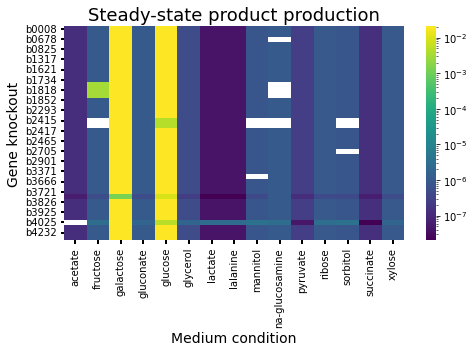

In [7]:
from matplotlib.colors import LogNorm, Normalize
fig, axs = plt.subplots(1, 1,figsize=(7, 5), sharex=True)
ax = axs
sns.heatmap(product_df.pivot("k", "gc", "p_final"), norm=LogNorm(), cmap='viridis')
ax.set_title('Steady-state product production', fontsize=18)
ax.set_ylabel('Gene knockout', fontsize=14)
ax.set_xlabel('Medium condition', fontsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
fig.tight_layout()

In [ ]:
#Plot burden vs heatmap
fig, axs = plt.subplots(1, 1,figsize=(7, 5), sharex=True)
ax = axs
sns.heatmap(product_df.pivot("k", "gc", "p_final"), norm=LogNorm(), cmap='viridis')
ax.set_title('Steady-state product production', fontsize=18)
ax.set_ylabel('Gene knockout', fontsize=14)
ax.set_xlabel('Medium condition', fontsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
fig.tight_layout()